3.11 模型选择、欠拟合和过拟合
在前几节基于Fashion-MNIST数据集的实验中，我们评价了机器学习模型在训练数据集和测试数据集上的表现。如果你改变过实验中的模型结构或者超参数，你也许发现了：当模型在训练数据集上更准确时，它在测试数据集上却不一定更准确。这是为什么呢？


3.11.1 训练误差和泛化误差
在解释上述现象之前，我们需要区分训练误差（training error）和泛化误差（generalization error）。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意一个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使用之前介绍过的损失函数，例如线性回归用到的平方损失函数和softmax回归用到的交叉熵损失函数。

让我们以高考为例来直观地解释训练误差和泛化误差这两个概念。训练误差可以认为是做往年高考试题（训练题）时的错误率，泛化误差则可以通过真正参加高考（测试题）时的答题错误率来近似。假设训练题和测试题都随机采样于一个未知的依照相同考纲的巨大试题库。如果让一名未学习中学知识的小学生去答题，那么测试题和训练题的答题错误率可能很相近。但如果换成一名反复练习训练题的高三备考生答题，即使在训练题上做到了错误率为0，也不代表真实的高考成绩会如此。

在机器学习里，我们通常假设训练数据集（训练题）和测试数据集（测试题）里的每一个样本都是从同一个概率分布中相互独立地生成的。基于该独立同分布假设，给定任意一个机器学习模型（含参数），它的训练误差的期望和泛化误差都是一样的。例如，如果我们将模型参数设成随机值（小学生），那么训练误差和泛化误差会非常相近。但我们从前面几节中已经了解到，模型的参数是通过在训练数据集上训练模型而学习出的，参数的选择依据了最小化训练误差（高三备考生）。所以，训练误差的期望小于或等于泛化误差。也就是说，一般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。

机器学习模型应关注降低泛化误差。

3.11.2 模型选择
在机器学习中，通常需要评估若干候选模型的表现并从中选择模型。这一过程称为模型选择（model selection）。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，我们通常要在模型选择上下一番功夫。下面，我们来描述模型选择中经常使用的验证数据集（validation data set）。


3.11.2.1 验证数据集
从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练数据集和测试数据集以外的数据来进行模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取一小部分作为验证集，而将剩余部分作为真正的训练集。

然而在实际应用中，由于数据不容易获取，测试数据极少只使用一次就丢弃。因此，实践中验证数据集和测试数据集的界限可能比较模糊。从严格意义上讲，除非明确说明，否则本书中实验所使用的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。

3.11.2.3 K折交叉验证
由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是K折交叉验证（K-fold cross-validation）。在K折交叉验证中，我们把原始训练数据集分割成K个不重合的子数据集，然后我们做K次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他K−1个子数据集来训练模型。在这K次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这K次训练误差和验证误差分别求平均。

3.11.3 欠拟合和过拟合
接下来，我们将探究模型训练中经常出现的两类典型问题：一类是模型无法得到较低的训练误差，我们将这一现象称作欠拟合（underfitting）；另一类是模型的训练误差远小于它在测试数据集上的误差，我们称该现象为过拟合（overfitting）。在实践中，我们要尽可能同时应对欠拟合和过拟合。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论两个因素：模型复杂度和训练数据集大小。

3.11.3.1 模型复杂度
为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征x和对应的标量标签y组成的训练数据集，多项式函数拟合的目标是找一个K阶多项式函数

为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征 x 和对应的标量标签 y 组成的训练数据集，多项式函数拟合的目标是找一个 K 阶多项式函数

\hat{y} = b + \sum_{k=1}^K x^k w_k


来近似 y。在上式中，wk是模型的权重参数，b是偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数模型参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此，高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如图3.4所示。给定训练数据集，如果模型的复杂度过低，很容易出现欠拟合；如果模型复杂度过高，很容易出现过拟合。应对欠拟合和过拟合的一个办法是针对数据集选择合适复杂度的模型。



3.11.3.2 训练数据集大小
影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随训练数据集里样本数量增加而增大。因此，在计算资源允许的范围之内，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。

3.11.4 多项式函数拟合实验
为了理解模型复杂度和训练数据集大小对欠拟合和过拟合的影响，下面我们以多项式函数拟合为例来实验。首先导入实验需要的包或模块。

In [50]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation
import sys
import matplotlib.pyplot as plt
import d2lzh as d2l
%matplotlib inline

3.11.4.1 生成数据集
我们将生成一个人工数据集。在训练数据集和测试数据集中，给定样本特征x，我们使用如下的三阶多项式函数来生成该样本的标签：y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + epsilon 其中噪声项ϵ服从均值为0、标准差为0.01的正态分布。训练数据集和测试数据集的样本数都设为100。

In [70]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = tf.random.normal(shape=(n_train + n_test, 1))
poly_features = tf.concat([features, tf.pow(features, 2), tf.pow(features, 3)],1)
print(poly_features.shape)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]+ true_w[2] * poly_features[:, 2] + true_b)
print(tf.shape(labels))
# labels += tf.random.normal(labels.shape,0,0.1)
print(tf.shape(labels))

(200, 3)
tf.Tensor([200], shape=(1,), dtype=int32)
tf.Tensor([200], shape=(1,), dtype=int32)


看一看生成的数据集的前两个样本。

In [71]:
features[:2], poly_features[:2], labels[:2]

(<tf.Tensor: id=2713209, shape=(2, 1), dtype=float32, numpy=
 array([[-1.9730895 ],
        [ 0.37837178]], dtype=float32)>,
 <tf.Tensor: id=2713213, shape=(2, 3), dtype=float32, numpy=
 array([[-1.9730895 ,  3.893082  , -7.681399  ],
        [ 0.37837178,  0.14316519,  0.05416967]], dtype=float32)>,
 <tf.Tensor: id=2713217, shape=(2,), dtype=float32, numpy=array([-53.62002  ,   5.2706347], dtype=float32)>)

3.11.4.2. 定义、训练和测试模型¶
我们先定义作图函数semilogy，其中 y 轴使用了对数尺度。

In [72]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

和线性回归一样，多项式函数拟合也使用平方损失函数。因为我们将尝试使用不同复杂度的模型来拟合生成的数据集，所以我们把模型定义部分放在fit_and_plot函数中。多项式函数拟合的训练和测试步骤与3.6节（softmax回归的从零开始实现）介绍的softmax回归中的相关步骤类似。

In [75]:
num_epochs=100

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = tf.keras.Sequential([tf.keras.layers.Dense(1)])
    batch_size = min(10, train_labels.shape[0])
#     batch_size = tf.cast(batch_size, 'int64')
    train_iter = tf.data.Dataset.from_tensor_slices((train_features, train_labels)).batch(10) 
    optimizer = tf.keras.optimizers.Adam()
    train_ls, test_ls, loss_history = [], [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                logits = net(X, training=True)
                l = tf.keras.losses.mse(logits, y)
                print(l)

            # 获取本批数据梯度
            grads = tape.gradient(l, net.trainable_variables)
            # 反向传播优化
            optimizer.apply_gradients(zip(grads, net.trainable_variables))

        train_ls.append(tf.keras.losses.mse(net(train_features), train_labels).numpy().mean())
        test_ls.append(tf.keras.losses.mse(net(test_features),test_labels).numpy().mean())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.get_weights()[0],
          '\nbias:', net.get_weights()[1])

3.11.4.3. 三阶多项式函数拟合（正常）¶
我们先使用与数据生成函数同阶的三阶多项式函数拟合。实验表明，这个模型的训练误差和在测试数据集的误差都较低。训练出的模型参数也接近真实值： w1=1.2,w2=−3.4,w3=5.6,b=5 。

tf.Tensor(
[946.929   674.59    692.5846  985.0542  678.06775 684.7721  672.81116
 676.75543 665.8366  645.04175], shape=(10,), dtype=float32)
tf.Tensor(
[286.21875 284.6864  284.7417  284.75018 288.5014  288.09827 284.70673
 322.98917 347.72964 338.0213 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 789.8026   753.1981   802.34955  753.1635   787.05835  779.7846
 1562.3325   792.27625  840.7122   825.4679 ], shape=(10,), dtype=float32)
tf.Tensor(
[2997.4805 1860.1555 1830.4426 1864.4277 1857.0983 1848.0719 1883.6656
 1961.4812 1838.275  1772.6338], shape=(10,), dtype=float32)
tf.Tensor(
[ 79.49876   67.78921   77.20399   78.84548   71.786224  79.14293
  81.61726  157.02948   70.98347   75.1135  ], shape=(10,), dtype=float32)
tf.Tensor(
[50.38317  24.020054 34.42257  27.705982 32.904305 31.659832 22.624985
 24.49998  54.04889  32.268364], shape=(10,), dtype=float32)
tf.Tensor(
[378.95007 309.8639  442.24234 477.00912 407.28    393.53632 516.9403
 444.5855  478.53107 809.7923 ], shape=(10,

 211.02756 209.18745 212.13419], shape=(10,), dtype=float32)
tf.Tensor(
[931.0399  675.08527 692.2107  966.53284 678.36694 684.7425  673.40594
 677.1279  666.78613 646.3958 ], shape=(10,), dtype=float32)
tf.Tensor(
[286.15005 284.68234 284.7494  284.72818 288.28278 287.58698 284.71353
 320.17743 342.97217 331.5582 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 790.0997   754.35913  802.10803  754.3243   787.4549   780.4267
 1496.0261   792.4799   837.77655  823.64856], shape=(10,), dtype=float32)
tf.Tensor(
[2924.229  1860.1394 1832.0306 1864.2318 1857.2158 1848.6498 1882.6615
 1956.7506 1839.4275 1775.9039], shape=(10,), dtype=float32)
tf.Tensor(
[ 79.388115  67.74337   77.20506   78.77002   71.95952   79.05184
  81.37175  150.11879   71.16942   75.19472 ], shape=(10,), dtype=float32)
tf.Tensor(
[48.814636 24.180872 34.165485 27.789425 32.750843 31.578817 22.760647
 24.657806 52.16035  32.153515], shape=(10,), dtype=float32)
tf.Tensor(
[379.2269  311.85123 438.52734 470.75238 406.0374  3

 677.54517 667.7861  647.8823 ], shape=(10,), dtype=float32)
tf.Tensor(
[286.09467 284.68054 284.75894 284.70966 288.09537 287.11435 284.72208
 317.65952 338.69476 325.5617 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 790.3519   755.49915  801.84143  755.4645   787.8035   781.0145
 1433.5984   792.6423   834.8971   821.8467 ], shape=(10,), dtype=float32)
tf.Tensor(
[2855.7368 1860.1653 1833.638  1864.0869 1857.3695 1849.251  1881.7496
 1952.3197 1840.5996 1779.3695], shape=(10,), dtype=float32)
tf.Tensor(
[ 79.27172   67.732254  77.19719   78.68776   72.123764  78.9544
  81.124466 143.56845   71.34791   75.26541 ], shape=(10,), dtype=float32)
tf.Tensor(
[47.30842  24.338999 33.91021  27.86555  32.595814 31.494013 22.901978
 24.811478 50.351456 32.035904], shape=(10,), dtype=float32)
tf.Tensor(
[379.48102 313.86075 434.9129  464.70035 404.81305 392.81342 498.73804
 436.9252  466.0009  744.98114], shape=(10,), dtype=float32)
tf.Tensor(
[1971.6898   946.8851  1021.9794  1010.7057   965.239

tf.Tensor(
[227.79546 241.29819 228.2865  229.98154 228.0405  225.77457 248.90413
 228.15274 266.31235 233.32016], shape=(10,), dtype=float32)
tf.Tensor(
[213.04922 209.65042 259.89777 209.45198 209.34807 230.5614  211.71086
 210.54597 209.17908 211.71329], shape=(10,), dtype=float32)
tf.Tensor(
[903.0827  676.1574  691.66394 933.9364  679.0531  684.81287 674.6774
 677.95715 668.7826  649.4576 ], shape=(10,), dtype=float32)
tf.Tensor(
[286.0418  284.6813  284.769   284.6959  287.91705 286.6918  284.73138
 315.28137 334.65912 320.0818 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 790.59753  756.6609   801.5789   756.6264   788.1442   781.59314
 1374.9955   792.79926  832.1172   820.1001 ], shape=(10,), dtype=float32)
tf.Tensor(
[2790.5312 1860.1936 1835.2292 1863.948  1857.5228 1849.8431 1880.863
 1948.0251 1841.7562 1782.9857], shape=(10,), dtype=float32)
tf.Tensor(
[ 79.15745   67.75226   77.18858   78.60662   72.28712   78.858536
  80.8838   137.41112   71.52661   75.334145], shape=(10

tf.Tensor(
[227.75443 239.83804 228.21057 229.74905 227.98296 225.76265 246.5845
 228.08699 262.3179  232.7391 ], shape=(10,), dtype=float32)
tf.Tensor(
[212.7532  209.56894 255.73404 209.42964 209.30998 227.69882 211.33919
 210.33708 209.1753  211.52107], shape=(10,), dtype=float32)
tf.Tensor(
[890.01404 676.6839  691.4032  918.72253 679.3896  684.8499  675.30286
 678.3638  669.7751  651.11487], shape=(10,), dtype=float32)
tf.Tensor(
[285.99136 284.68448 284.7795  284.6866  287.7475  286.3169  284.74155
 313.03714 330.85513 315.094  ], shape=(10,), dtype=float32)
tf.Tensor(
[ 790.8367   757.8418   801.3207   757.8075   788.4771   782.1622
 1320.061    792.95123  829.4341   818.407  ], shape=(10,), dtype=float32)
tf.Tensor(
[2728.4937 1860.2246 1836.8031 1863.8151 1857.6764 1850.4271 1879.9996
 1943.8633 1842.8971 1786.7399], shape=(10,), dtype=float32)
tf.Tensor(
[ 79.0453    67.80143   77.17932   78.52664   72.44941   78.76423
  80.64956  131.63033   71.70534   75.400955], shape=(10,

 1110.2024  1072.2073   960.0664  1017.77655], shape=(10,), dtype=float32)
tf.Tensor(
[227.71431 238.47769 228.13701 229.52754 227.92697 225.75632 244.43112
 228.0232  258.60382 232.19243], shape=(10,), dtype=float32)
tf.Tensor(
[212.47476 209.49524 251.8261  209.40869 209.27544 225.09317 211.00266
 210.14807 209.17172 211.34024], shape=(10,), dtype=float32)
tf.Tensor(
[877.52423 677.20386 691.15076 904.1981  679.7218  684.88806 675.92126
 678.765   670.76263 652.8471 ], shape=(10,), dtype=float32)
tf.Tensor(
[285.94318 284.68988 284.79047 284.6816  287.58633 285.98712 284.75244
 310.9214  327.2734  310.5747 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 791.0691   759.03925  801.06635  759.00525  788.8021   782.7213
 1268.6409   793.0979   826.84503  816.76624], shape=(10,), dtype=float32)
tf.Tensor(
[2669.511  1860.2578 1838.3594 1863.6887 1857.8293 1851.0027 1879.1608
 1939.8307 1844.0221 1790.6195], shape=(10,), dtype=float32)
tf.Tensor(
[ 78.93523   67.87795   77.16935   78.447754  7

tf.Tensor(
[212.21329 209.42896 248.16333 209.38892 209.24442 222.7319  210.6995
 209.97794 209.16841 211.17036], shape=(10,), dtype=float32)
tf.Tensor(
[865.5934  677.71716 690.9064  890.3392  680.0495  684.9274  676.53235
 679.161   671.74445 654.64813], shape=(10,), dtype=float32)
tf.Tensor(
[285.89728 284.6975  284.80182 284.6806  287.43323 285.70016 284.76398
 308.92896 323.90506 306.50104], shape=(10,), dtype=float32)
tf.Tensor(
[ 791.29504  760.2506   800.816    760.2172   789.1192   783.27057
 1220.5852   793.2396   824.34717  815.17664], shape=(10,), dtype=float32)
tf.Tensor(
[2613.4712 1860.2936 1839.8971 1863.5676 1857.982  1851.5691 1878.346
 1935.925  1845.1311 1794.612 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 78.82716   67.98001   77.158676  78.36994   72.77007   78.58016
  80.19981  121.13544   72.06165   75.528694], shape=(10,), dtype=float32)
tf.Tensor(
[41.97962  24.984936 32.959858 28.151882 32.010643 31.167889 23.541224
 25.429184 43.985207 31.58837 ], shape=(10,

 1092.3951  1060.8105   963.2873  1015.54395], shape=(10,), dtype=float32)
tf.Tensor(
[227.63669 236.0387  227.99673 229.11588 227.81958 225.75899 240.59317
 227.90117 251.96811 231.19658], shape=(10,), dtype=float32)
tf.Tensor(
[211.96799 209.36967 244.7356  209.3704  209.21664 220.60306 210.42801
 209.82576 209.16528 211.01096], shape=(10,), dtype=float32)
tf.Tensor(
[854.2025  678.2236  690.67035 877.1224  680.37286 684.9682  677.13574
 679.5515  672.7196  656.51086], shape=(10,), dtype=float32)
tf.Tensor(
[285.85352 284.70718 284.81354 284.6834  287.28793 285.45374 284.7762
 307.0549  320.74127 302.85065], shape=(10,), dtype=float32)
tf.Tensor(
[ 791.5141   761.4735   800.5696   761.44055  789.4281   783.8095
 1175.7491   793.37585  821.9381   813.6368 ], shape=(10,), dtype=float32)
tf.Tensor(
[2560.2676 1860.3318 1841.415  1863.4531 1858.1344 1852.1272 1877.5541
 1932.143  1846.2239 1798.7054], shape=(10,), dtype=float32)
tf.Tensor(
[ 78.72106   68.10579   77.14726   78.29317   72

 209.6906  209.1624  210.86157], shape=(10,), dtype=float32)
tf.Tensor(
[843.33386 678.7231  690.4425  864.5262  680.6918  685.0104  677.7313
 679.9366  673.6874  658.42944], shape=(10,), dtype=float32)
tf.Tensor(
[285.81186 284.7187  284.82565 284.68976 287.15018 285.24554 284.78906
 305.29437 317.77374 299.602  ], shape=(10,), dtype=float32)
tf.Tensor(
[ 791.7264   762.70526  800.32697  762.673    789.7288   784.33777
 1133.992    793.5067   819.61536  812.1457 ], shape=(10,), dtype=float32)
tf.Tensor(
[2509.7952 1860.3727 1842.9127 1863.3447 1858.2871 1852.6765 1876.7859
 1928.4828 1847.3    1802.8887], shape=(10,), dtype=float32)
tf.Tensor(
[ 78.616875  68.253586  77.135086  78.21739   73.08404   78.401855
  79.77406  111.96271   72.4145    75.648224], shape=(10,), dtype=float32)
tf.Tensor(
[39.69701  25.311237 32.5247   28.283564 31.73797  31.012253 23.895601
 25.736095 41.277813 31.37765 ], shape=(10,), dtype=float32)
tf.Tensor(
[380.84503 326.59525 415.53842 432.77774 398.07513 

 303.64258 314.9942  296.7339 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 791.9316   763.9434   800.088    763.9119   790.02094  784.8547
 1095.1755   793.6322   817.3769   810.7024 ], shape=(10,), dtype=float32)
tf.Tensor(
[2461.9526 1860.4164 1844.3903 1863.2429 1858.4401 1853.2174 1876.0417
 1924.942  1848.3584 1807.1498], shape=(10,), dtype=float32)
tf.Tensor(
[ 78.51459   68.42164   77.1221    78.14259   73.237946  78.31477
  79.56987  107.83623   72.58886   75.70479 ], shape=(10,), dtype=float32)
tf.Tensor(
[38.642834 25.474005 32.316578 28.34631  31.606342 30.936163 24.079107
 25.888083 40.032387 31.275372], shape=(10,), dtype=float32)
tf.Tensor(
[381.0449  328.78897 412.66992 428.1333  397.04922 390.41785 445.61005
 413.71768 428.80533 566.5369 ], shape=(10,), dtype=float32)
tf.Tensor(
[1480.9941   960.15607 1013.70245 1007.3961   974.1986  1017.9081
 1074.7946  1049.4421   966.6157  1013.26526], shape=(10,), dtype=float32)
tf.Tensor(
[227.55725 233.8103  227.85611 228.71829 22

 227.73116 243.82239 229.92622], shape=(10,), dtype=float32)
tf.Tensor(
[211.32234 209.23047 235.76396 209.32153 209.15149 215.49431 209.78752
 209.46782 209.15732 210.59119], shape=(10,), dtype=float32)
tf.Tensor(
[823.0915  679.7006  690.01184 841.1089  681.3164  685.099   678.89795
 680.69006 675.59705 662.40826], shape=(10,), dtype=float32)
tf.Tensor(
[285.7347  284.747   284.8509  284.71222 286.896   284.9355  284.81647
 302.09506 312.3946  294.22568], shape=(10,), dtype=float32)
tf.Tensor(
[ 792.12964  765.18555  799.85266  765.15466  790.3045   785.3603
 1059.1663   793.7521   815.2202   809.3058 ], shape=(10,), dtype=float32)
tf.Tensor(
[2416.6418 1860.4625 1845.8457 1863.1477 1858.5928 1853.7498 1875.3207
 1921.5188 1849.4004 1811.4772], shape=(10,), dtype=float32)
tf.Tensor(
[ 78.41411   68.608284  77.10831   78.06871   73.38951   78.229004
  79.37129  103.99796   72.76147   75.7591  ], shape=(10,), dtype=float32)
tf.Tensor(
[37.643764 25.636059 32.114563 28.406902 31.477774 

 300.64728 309.9672  292.0573 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 792.3203   766.42883  799.6208   766.3989   790.5791   785.8542
 1025.8334   793.86615  813.1434   807.9548 ], shape=(10,), dtype=float32)
tf.Tensor(
[2373.7656 1860.512  1847.2787 1863.0588 1858.7458 1854.2732 1874.623
 1918.2102 1850.4242 1815.8597], shape=(10,), dtype=float32)
tf.Tensor(
[ 78.3154    68.811844  77.09363   77.995705  73.5385    78.144516
  79.1782   100.43455   72.93201   75.81114 ], shape=(10,), dtype=float32)
tf.Tensor(
[36.697655 25.797049 31.918524 28.465271 31.352184 30.787241 24.455448
 26.187698 37.743835 31.076733], shape=(10,), dtype=float32)
tf.Tensor(
[381.41983 333.198   407.22073 419.3753  395.0771  389.77972 433.1336
 408.04208 419.9043  527.5156 ], shape=(10,), dtype=float32)
tf.Tensor(
[1376.5198  963.6862 1011.5807 1006.5172  976.5295 1014.8296 1059.6667
 1039.5793  969.5994 1011.2416], shape=(10,), dtype=float32)
tf.Tensor(
[227.4863  232.05566 227.7333  228.38477 227.61504 22

 209.30257 209.15305 210.35576], shape=(10,), dtype=float32)
tf.Tensor(
[804.73035 680.6486  689.6148  819.9225  681.92303 685.1942  680.0306
 681.42084 677.46704 666.536  ], shape=(10,), dtype=float32)
tf.Tensor(
[285.66534 284.7816  284.87738 284.7464  286.66876 284.7531  284.84598
 299.29486 307.70425 290.20914], shape=(10,), dtype=float32)
tf.Tensor(
[792.5036  767.6712  799.39246 767.6423  790.8449  786.3359  995.0497
 793.9744  811.1439  806.6483 ], shape=(10,), dtype=float32)
tf.Tensor(
[2333.2305 1860.5647 1848.6888 1862.9766 1858.9    1854.7878 1873.9495
 1915.0153 1851.4299 1820.2874], shape=(10,), dtype=float32)
tf.Tensor(
[78.218414 69.0307   77.078064 77.92355  73.684685 78.06125  78.99049
 97.13301  73.100174 75.86082 ], shape=(10,), dtype=float32)
tf.Tensor(
[35.802418 25.956638 31.728323 28.521336 31.229523 30.71434  24.646982
 26.334766 36.695274 30.980274], shape=(10,), dtype=float32)
tf.Tensor(
[381.59454 335.4048  404.63568 415.2517  394.13022 389.46786 427.29865
 4

 227.57571 237.58322 228.89355], shape=(10,), dtype=float32)
tf.Tensor(
[210.79866 209.14217 228.56364 209.28183 209.11043 212.07028 209.37576
 209.23947 209.1512  210.25017], shape=(10,), dtype=float32)
tf.Tensor(
[796.21497 681.111   689.4291  810.11676 682.2198  685.2444  680.5834
 681.7777  678.3851  668.641  ], shape=(10,), dtype=float32)
tf.Tensor(
[285.63342 284.80087 284.89108 284.76733 286.56458 284.70483 284.8614
 298.0336  305.59845 288.66196], shape=(10,), dtype=float32)
tf.Tensor(
[792.6793  768.91003 799.1676  768.8821  791.10114 786.805   966.6917
 794.0767  809.2203  805.38574], shape=(10,), dtype=float32)
tf.Tensor(
[2294.946  1860.6213 1850.075  1862.9011 1859.0543 1855.2943 1873.2992
 1911.9313 1852.4174 1824.7478], shape=(10,), dtype=float32)
tf.Tensor(
[78.12312  69.263214 77.061554 77.85223  73.82784  77.97918  78.80806
 94.08069  73.26566  75.90806 ], shape=(10,), dtype=float32)
tf.Tensor(
[34.956017 26.114481 31.543835 28.575022 31.109716 30.64243  24.839905
 26

tf.Tensor(
[210.64827 209.1226  226.51558 209.27043 209.10141 211.2542  209.28252
 209.18832 209.14957 210.15215], shape=(10,), dtype=float32)
tf.Tensor(
[788.1225  681.56573 689.2521  800.8109  682.512   685.2965  681.1269
 682.1287  679.29083 670.76587], shape=(10,), dtype=float32)
tf.Tensor(
[285.60333 284.82147 284.90503 284.7906  286.4664  284.68256 284.87726
 296.85925 303.64252 287.39716], shape=(10,), dtype=float32)
tf.Tensor(
[792.8471  770.14307 798.9458  770.1161  791.34796 787.26105 940.63837
 794.17285 807.37036 804.1662 ], shape=(10,), dtype=float32)
tf.Tensor(
[2258.8228 1860.6803 1851.4371 1862.8334 1859.2096 1855.7917 1872.6725
 1908.9564 1853.3861 1829.232 ], shape=(10,), dtype=float32)
tf.Tensor(
[78.02948  69.5078   77.04408  77.78166  73.967735 77.898285 78.63078
 91.26529  73.4282   75.95279 ], shape=(10,), dtype=float32)
tf.Tensor(
[34.156487 26.270239 31.364933 28.626257 30.99271  30.571468 25.033579
 26.622005 34.7765   30.792852], shape=(10,), dtype=float32)
t

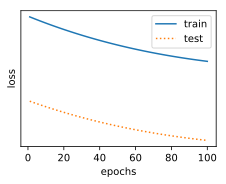

In [76]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])

3.11.4.4. 线性函数拟合（欠拟合）¶
我们再试试线性函数拟合。很明显，该模型的训练误差在迭代早期下降后便很难继续降低。在完成最后一次迭代周期后，训练误差依旧很高。线性模型在非线性模型（如三阶多项式函数）生成的数据集上容易欠拟合。

tf.Tensor([1510.6729 1436.766 ], shape=(2,), dtype=float32)
tf.Tensor([1509.935 1436.732], shape=(2,), dtype=float32)
tf.Tensor([1509.1975 1436.698 ], shape=(2,), dtype=float32)
tf.Tensor([1508.4606 1436.6641], shape=(2,), dtype=float32)
tf.Tensor([1507.7236 1436.6302], shape=(2,), dtype=float32)
tf.Tensor([1506.9877 1436.5962], shape=(2,), dtype=float32)
tf.Tensor([1506.2518 1436.5624], shape=(2,), dtype=float32)
tf.Tensor([1505.5168 1436.5284], shape=(2,), dtype=float32)
tf.Tensor([1504.7819 1436.4946], shape=(2,), dtype=float32)
tf.Tensor([1504.0476 1436.4606], shape=(2,), dtype=float32)
tf.Tensor([1503.3138 1436.4268], shape=(2,), dtype=float32)
tf.Tensor([1502.5807 1436.3928], shape=(2,), dtype=float32)
tf.Tensor([1501.8478 1436.359 ], shape=(2,), dtype=float32)
tf.Tensor([1501.1157 1436.325 ], shape=(2,), dtype=float32)
tf.Tensor([1500.3838 1436.2911], shape=(2,), dtype=float32)
tf.Tensor([1499.6526 1436.2572], shape=(2,), dtype=float32)
tf.Tensor([1498.9219 1436.2234], shape=(2,

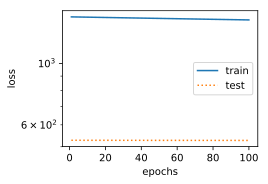

In [77]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])